In [ ]:
!wget http://images.cocodataset.org/annotations/annotations_trainval2017.zip

--2020-05-04 15:20:04--  http://images.cocodataset.org/annotations/annotations_trainval2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.216.130.27
Connecting to images.cocodataset.org (images.cocodataset.org)|52.216.130.27|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 252907541 (241M) [application/zip]
Saving to: ‘annotations_trainval2017.zip’

annotations_trainva 100%[===================>] 241.19M  10.2MB/s    in 37s     

2020-05-04 15:20:42 (6.49 MB/s) - ‘annotations_trainval2017.zip’ saved [252907541/252907541]



In [ ]:
import albumentations as A

In [ ]:
import operator

In [ ]:
from pycocotools.coco import COCO

In [ ]:
BOX_COLOR = (255, 0, 0)
TEXT_COLOR = (255, 255, 255)

def visualize_bbox(img, bbox, class_id, class_idx_to_name, color=BOX_COLOR, thickness=2):
    'From https://bit.ly/2W040oD'
    x_min, y_min, w, h = bbox
    x_min, x_max, y_min, y_max = int(x_min), int(x_min + w), int(y_min), int(y_min + h)
    cv2.rectangle(img, (x_min, y_min), (x_max, y_max), color=color, thickness=thickness)
    class_name = class_idx_to_name[class_id]
    ((text_width, text_height), _) = cv2.getTextSize(class_name, cv2.FONT_HERSHEY_SIMPLEX, 0.35, 1)    
    cv2.rectangle(img, (x_min, y_min - int(1.3 * text_height)), (x_min + text_width, y_min), BOX_COLOR, -1)
    cv2.putText(img, class_name, (x_min, y_min - int(0.3 * text_height)), cv2.FONT_HERSHEY_SIMPLEX, 0.35,TEXT_COLOR, lineType=cv2.LINE_AA)
    return img

In [ ]:
def visualize(annotations, category_id_to_name):
    'From https://bit.ly/2W040oD'
    img = annotations['image'].copy()
    for idx, bbox in enumerate(annotations['bboxes']):
        img = visualize_bbox(img, bbox, annotations['category_id'][idx], category_id_to_name)
    plt.figure(figsize=(12, 12))
    plt.imshow(img)

In [ ]:
import cv2
# TODO: assert fn exists
def open_image(fn): return cv2.cvtColor(cv2.imread(str(fn)), cv2.COLOR_BGR2RGB)

In [ ]:
import matplotlib.pyplot as plt
def show_image(im, ax=None):
    if ax is None: fig,ax = plt.subplots()
    ax.set_axis_off()
    ax.imshow(im)
    return ax

In [ ]:
def grid(f, fns):
    fig,axs = plt.subplots(ncols=len(fns))
    for fn,ax in zip(fns,axs): show_image(fn, ax)

In [ ]:
def lmap(func, *iterables): return list(map(func, *iterables))

In [ ]:
from pathlib import Path
source = Path('/home/lgvaz/.fastai/data/coco_sample')

In [ ]:
import json
annot = json.load(open(source/'annotations/train_sample.json'))

In [ ]:
fns = list((source/'train_sample').glob('*.jpg'))

In [ ]:
def reverse_dict(d): return {v:k for k,v in d.items()}

In [ ]:
id2fn = {o['id']:o['file_name'] for o in annot['images']}
fn2id = reverse_dict(id2fn)

In [ ]:
id2cats = {o['id']:o['name'] for o in annot['categories']}
cats2id = reverse_dict(id2cats)

In [ ]:
from collections import defaultdict
id2bbox = defaultdict(list)
for o in annot['annotations']:
    id2bbox[o['image_id']].append((o['category_id'], o['bbox']))

In [ ]:
fns = ['img.jpg', 'horse.jpg']
ims = lmap(open_image, fns)

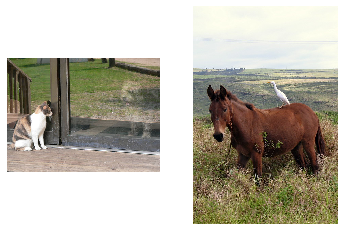

In [ ]:
grid(show_image, ims)

In [ ]:
fn = fns[2]
iid = fn2id[fn.name]
bboxes = id2bbox[iid]
im = open_image(fn)

In [ ]:
cat_ids,boxes = zip(*bboxes)

In [ ]:
an = {'image':im, 'bboxes': boxes, 'category_id': cat_ids}

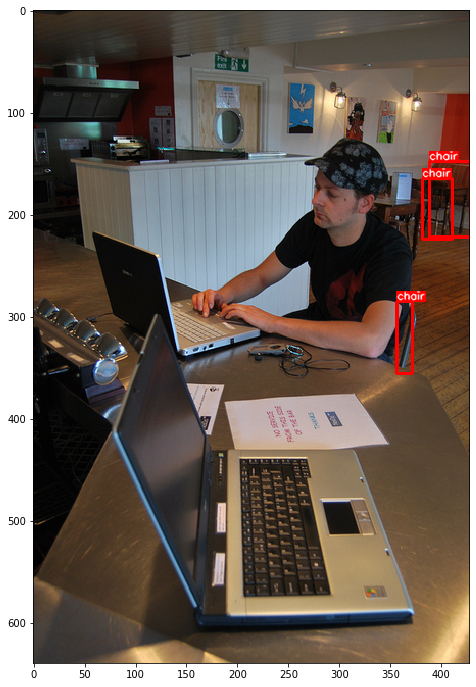

In [ ]:
visualize(an, cats)

In [ ]:
# Annotations for image 386298 from COCO http://cocodataset.org/#explore?id=386298
annotations = {'image': image, 'bboxes': [[366.7, 80.84, 132.8, 181.84], [5.66, 138.95, 147.09, 164.88]], 'category_id': [18, 17]}
category_id_to_name = {17: 'cat', 18: 'dog'}

In [ ]:
# get all images containing given categories, select one at random
catIds = coco.getCatIds(catNms=['person','dog','skateboard']);
imgIds = coco.getImgIds(catIds=catIds );
imgIds = coco.getImgIds(imgIds = [324158])
img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]

NameError: name 'coco' is not defined